## 붓꽃의 품종 종류
#### 휴먼지능정보공학전공 201910787 김영서

### 0. Import libraries

In [3]:
import numpy as np
import pandas as pd

### 1. 데이터 적재
#### sepal: 꽃받침, petal: 꽃잎

In [4]:
# 머신러닝과 통계 분야에서 오래전부터 사용해 온 붓꽃(iris) 데이터 셋
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
print "iris_dataset의 키:\n", iris_dataset.keys()

iris_dataset의 키:
['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']


In [6]:
print iris_dataset['DESCR'][:193] + "\n..."

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [7]:
print "타깃의 이름:", iris_dataset['target_names']

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [8]:
print "특성의 이름:\n", iris_dataset['feature_names']

특성의 이름:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print "data의 타입:", type(iris_dataset['data'])

data의 타입: <type 'numpy.ndarray'>


In [10]:
print "data의 크기:", iris_dataset['data'].shape

data의 크기: (150, 4)


In [11]:
print "data의 처음 다섯 행:\n", iris_dataset['data'][:5]

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
print "target의 타입:", type(iris_dataset['target'])

target의 타입: <type 'numpy.ndarray'>


In [13]:
print "target의 크기:", iris_dataset['target'].shape

target의 크기: (150,)


In [14]:
print "타깃:\n", iris_dataset['target']

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 2. 성과 측정: 훈련 데이터(Train data)와 테스트 데이터(Test data)

In [15]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'],
                                                    random_state=0)

In [16]:
print "X_train 크기:", X_train.shape
print "y_train 크기:", y_train.shape

X_train 크기: (112, 4)
y_train 크기: (112,)


In [17]:
print "X_test 크기:", X_test.shape
print "y_test 크기:", y_test.shape

X_test 크기: (38, 4)
y_test 크기: (38,)


### 3. 가장 먼저 할 일: 데이터 살펴보기(에러)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f17d09810>,
      dtype=object)

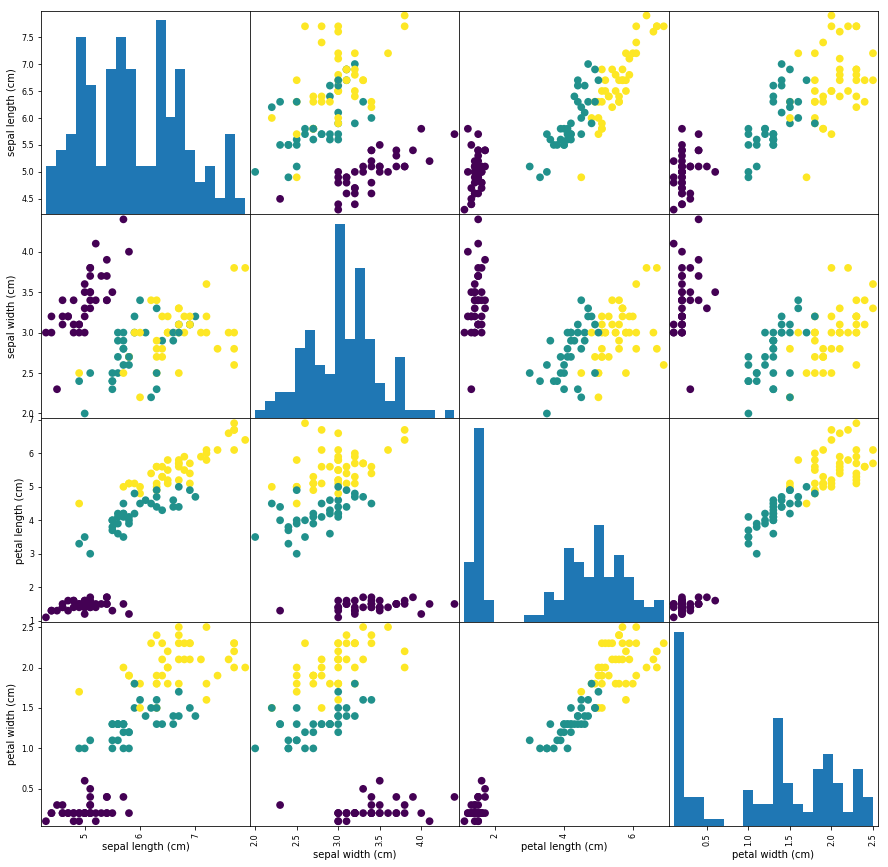

In [20]:
#X_train 데이터를 사용해서 데이터 프레임을 만듦.
#열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
#데이터프레임을 사용해 y_train에 따라 색으로 구분된 산정도 행렬을 만듦
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=8)

### 4. 첫 번째 머신러닝 모델:k-최근접 이웃 알고리즘
### (k-Nearest Neighbors, k-NN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### 5. 예측하기

In [23]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print "X_new.shape:", X_new.shape

X_new.shape: (1, 4)


In [24]:
prediction = knn.predict(X_new)
print "예측:", prediction
print "예측한 타깃의 이름:", iris_dataset['target_names'][prediction]

예측: [0]
예측한 타깃의 이름: ['setosa']


### 6. 모델 평가하기

In [25]:
y_pred = knn.predict(X_test)
print "테스트 세트에 대한 예측값:\n", y_pred

테스트 세트에 대한 예측값:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [26]:
print "테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test))

테스트 세트의 정확도: 0.97
